In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pathlib import Path

# %matplotlib widget

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return signal.butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

In [3]:
files = list(Path("data/220411/").glob("*.csv"))
files.sort()
data = []
for file in files:
    data.append(np.loadtxt(file, delimiter=","))

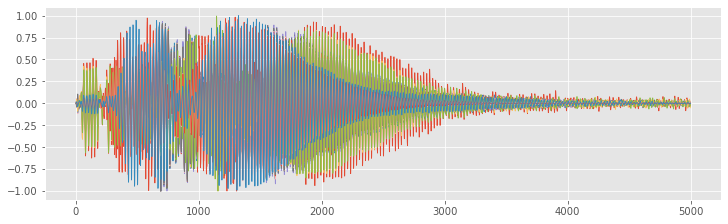

In [4]:
for dat in data:
    filt = butter_bandpass_filter(dat[:,1], 20e3, 80e3, 1e6)
    filt /= max(abs(filt))
    plt.plot(filt)

In [5]:
fs = 1e6
T = 25e-6
nT_delay = 17/2
t_delay = T * nT_delay
nS_delay = int(t_delay * fs)

In [6]:
fftdata = []
for dat in data:
    filt = butter_bandpass_filter(dat[:,1], 20e3, 80e3, 1e6)
    tfilt = np.arange(0, len(filt)) / 1e6
    
    f, t, Zxx = signal.spectrogram(
        filt,
        1e6,
        nfft=10e3,
        nperseg=200,
        noverlap=195)
    
    fftdata.append([f, t, Zxx, tfilt, filt])

15

Text(0.02, 0.5, 'Frequency [Hz]')

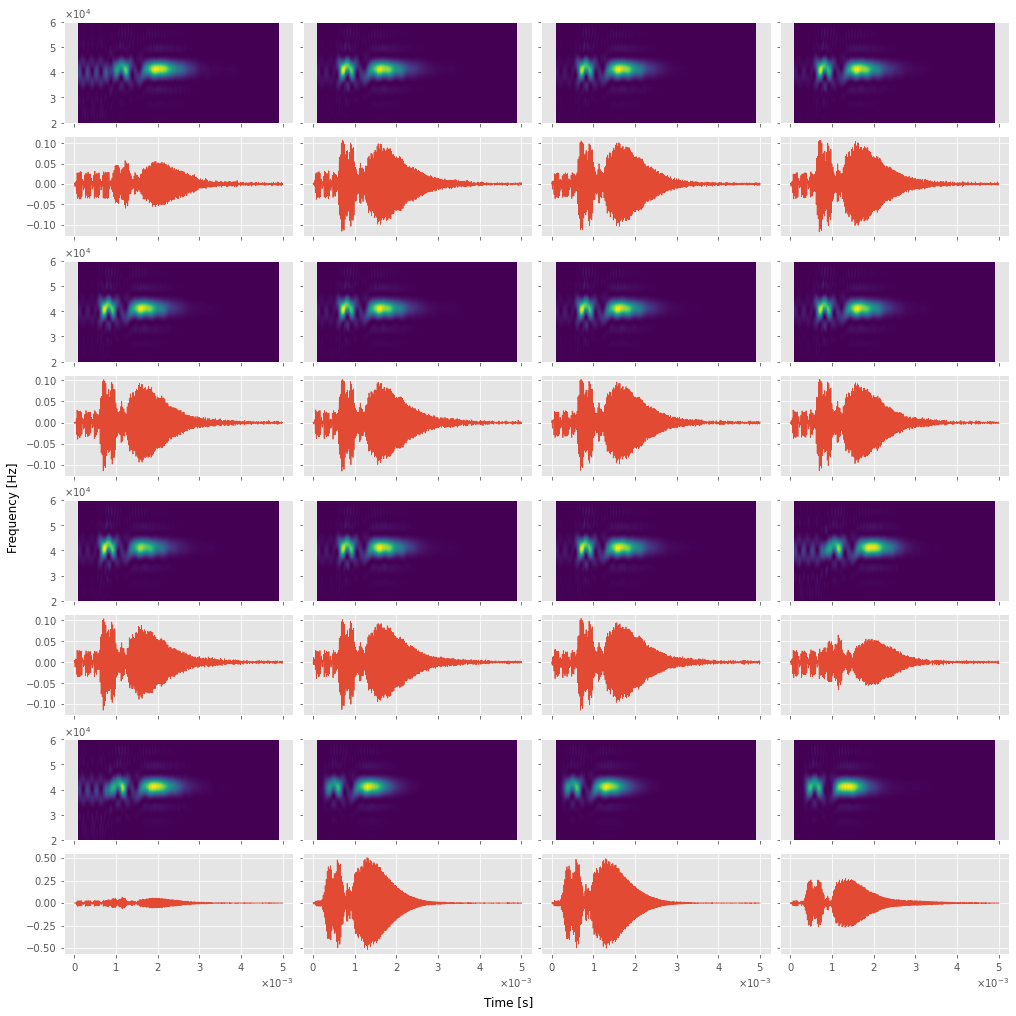

In [17]:
fig, axd = plt.subplots(8, 4, figsize=(14,14), sharex=True, sharey="row")

for i, (f, t, Zxx, tfilt, filt) in enumerate(fftdata):
    print(f"\r\033[K{i}", end="")
    
    # axt = axd[f"t{i}"]
    # axb = axd[f"b{i}"]
    
    axt = axd[2*(i // 4)    ][i % 4]
    axb = axd[2*(i // 4) + 1][i % 4]
    
    
    axt.grid(False)
    axt.pcolormesh(t, f, np.abs(Zxx))
    axt.set_ylim([20e3, 60e3])
    
    axb.plot(tfilt, filt)

    # axt.set_ylabel("Frequency [Hz]")
    axt.ticklabel_format(style="sci", scilimits=(-3, 2), axis="both", useMathText=True)
    axt.ticklabel_format(style="sci", scilimits=(-1, 2), axis="both", useMathText=True)

fig.supxlabel("Time [s]")
fig.supylabel("Frequency [Hz]")

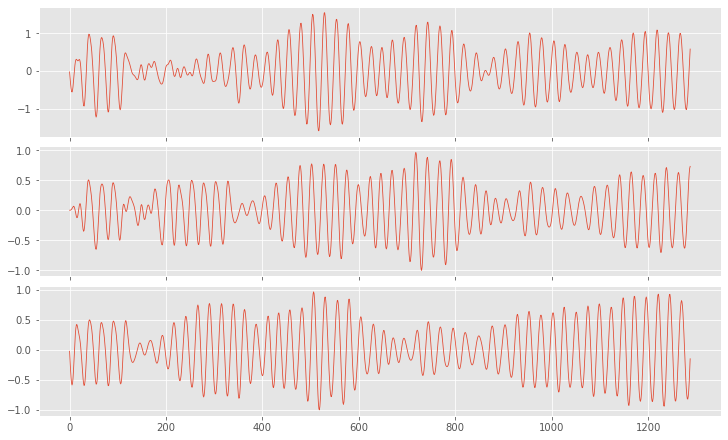

In [8]:
fig, axd = plt.subplot_mosaic([
    ["top"],
    ["mid"],
    ["bot"],
], sharex=True, figsize=(10,6))
for dat in data[:1]:
    filt = butter_bandpass_filter(dat[500:2000,1], 20e3, 80e3, 1e6)
    filt /= max(abs(filt))
    
    shift = filt[:-nS_delay] + filt[nS_delay:]
    
    axd["top"].plot(shift)
    axd["mid"].plot(filt[:-nS_delay])
    axd["bot"].plot(filt[nS_delay:])